In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'] 
sns.pairplot(df[cols], size=1.5) 
plt.tight_layout() 
plt.show() 

C:\Users\Admin\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 750x750 with 30 Axes>

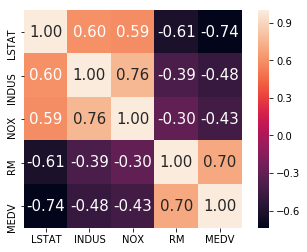

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '0.2f', annot_kws = {'size':15}, 
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [4]:
#LinearRegressor
class LinearRegressionGD(object):
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter
        
    def net_input(self, X):
        return np.dot(X ,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            return self

In [5]:
##Visualization
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [ ]:
sns.reset_orig() 
# resets matplotlib style 
plt.plot(range(1, lr.n_iter+1), lr.cost_) 
plt.ylabel('SSE') 
plt.xlabel('Epoch') 
plt.show() 

Text(0,0.5,'Price in $1000s [MEDV] (standardized)')

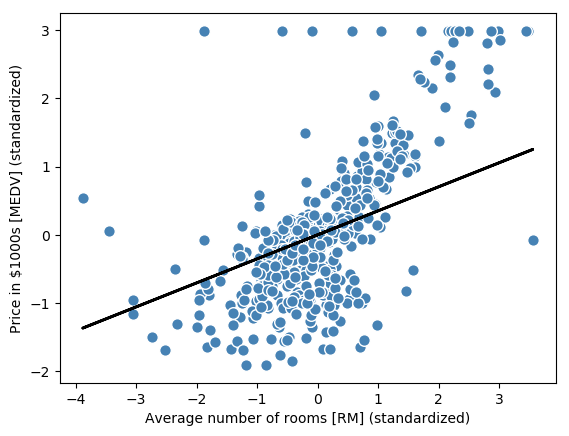

In [7]:
#Visualization of linear regression line fitting the training data
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

In [8]:
#house price prediction for five room house
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print(sc_y.inverse_transform(price_std))

[16.61620793]


In [9]:
print(lr.w_[1])
print(lr.w_[0])

0.3518521332181989
-2.6290081223123706e-16


9.10210898118031
-34.67062077643857


Text(0,0.5,'Price in $1000s [MEDV] (standardized)')

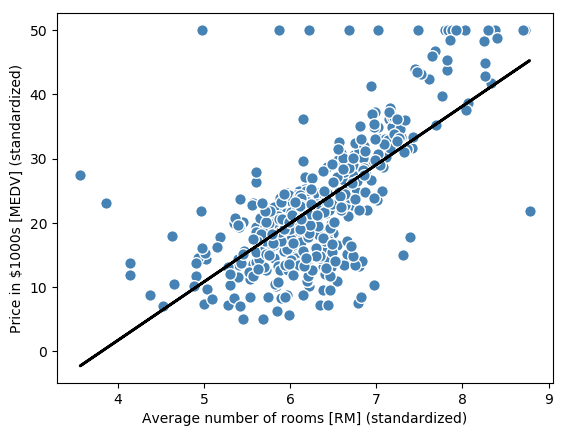

In [10]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print(slr.coef_[0])
print(slr.intercept_)
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

In [11]:
#Using ransac algorithm
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', 
                          residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

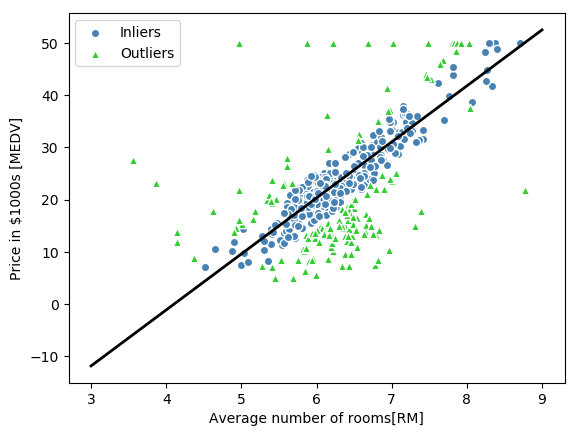

In [14]:
#Obtaining outliers and inliers from the fitted RANSAC linear regression model
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'steelblue', edgecolor = 'white', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'limegreen', edgecolor= 'white', marker = '^', label = 'Outliers')
plt.plot(line_X, line_y, color = 'black', lw = 2)
plt.xlabel('Average number of rooms[RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc = 'best')
plt.show()

In [17]:
#slope and intercept of the line
print(ransac.estimator_.coef_)
print(ransac.estimator_.intercept_)

[10.73450881]
-44.08906428639813


In [21]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

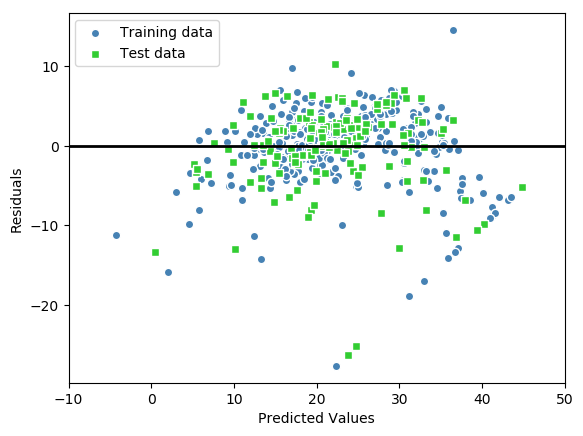

In [23]:
#Visualizing residual vs. predicted values
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'steelblue', edgecolor='white', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'limegreen', edgecolor='white', marker = 's', label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'best')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

In [24]:
#Meansquarederror
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

19.96574381015786
27.183847647603407


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7644563391821222
0.6735280865347231


In [28]:
#Add second degree polynomial term
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree= 2)
X_quad = quadratic.fit_transform(X)

In [29]:
#Fitting simple regression model
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [30]:
#Fitting multiple regression model
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

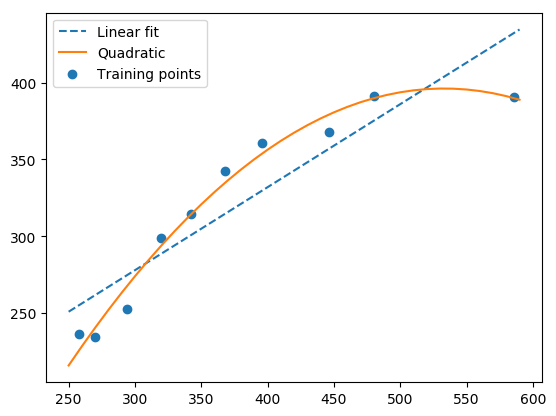

In [31]:
#Plotting results
plt.scatter(X, y, label = 'Training points')
plt.plot(X_fit, y_lin_fit, label = 'Linear fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit, label = 'Quadratic')
plt.legend(loc = 'best')
plt.show()

In [33]:
#calculating mean-squared-error and r2-score
y_lin_pred= lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print(mean_squared_error(y, y_lin_pred))
print(mean_squared_error(y, y_quad_pred))
print(r2_score(y, y_lin_pred))
print(r2_score(y, y_quad_pred))

569.7796663183207
61.330214517447715
0.8317053837891232
0.9818850241163604


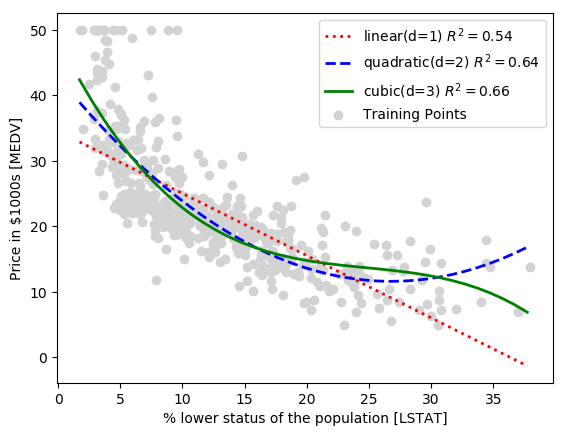

In [34]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

#Creating quadratic features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#Plot results
plt.scatter(X, y, label='Training Points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'linear(d=1) $R^2 = %.2f$'%linear_r2, color = 'red', lw = 2, linestyle = ':')
plt.plot(X_fit, y_quad_fit, label = 'quadratic(d=2) $R^2 = %.2f$'%quadratic_r2, color = 'blue', lw = 2, linestyle = '--')
plt.plot(X_fit, y_cubic_fit, label = 'cubic(d=3) $R^2 = %.2f$'%cubic_r2, color = 'green', lw= 2, linestyle = '-')
plt.xlabel('% lower status of the population [LSTAT]') 
plt.ylabel('Price in $1000s [MEDV]') 
plt.legend(loc='upper right') 
plt.show() 

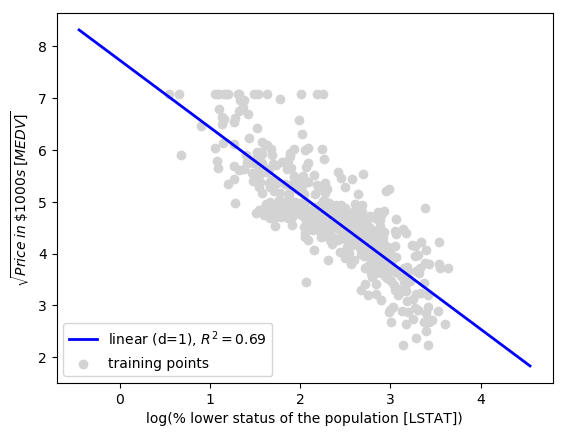

In [35]:
#Plotting logarithmic function
X_log = np.log(X)
y_sqrt = np.sqrt(y)
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
plt.scatter(X_log, y_sqrt, 
            label='training points', color='lightgray') 
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2) 
plt.xlabel('log(% lower status of the population [LSTAT])') 
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$') 
plt.legend(loc='lower left') 
plt.show() 

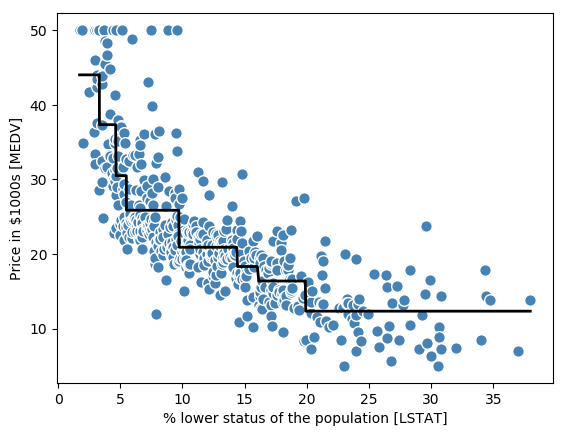

In [36]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]') 
plt.ylabel('Price in $1000s [MEDV]') 
plt.show() 

In [37]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
X = df.iloc[:, :-1].values
y = df['MEDV'].values
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state = 1, n_jobs = -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.636020244521397
11.070168570886718
0.9795576846534061
0.8774240686102585


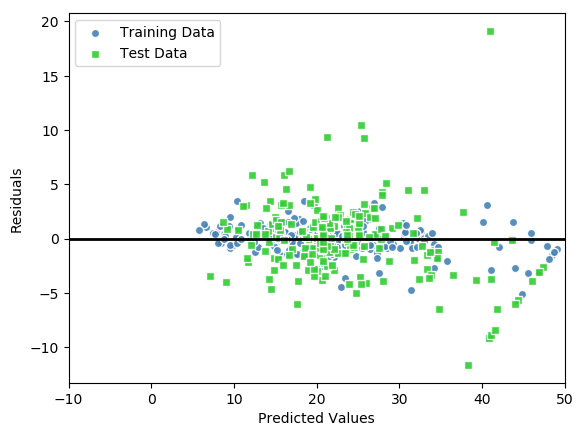

In [39]:
#Visualizing via Residualplot
plt.scatter(y_train_pred, y_train_pred-y_train, c = 'steelblue', edgecolor='white', marker='o', s = 35, alpha = 0.9, label = 'Training Data')
plt.scatter(y_test_pred, y_test_pred-y_test, c = 'limegreen', edgecolor = 'white', marker = 's', s = 35, alpha = 0.9, label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'best')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'black')
plt.xlim([-10, 50])
plt.show()